# Membuat CNN(Convolutional Neural Network) untuk mengenali  PAPER ROCK dan SCISSOR.
NAMA   : Dana Fatadilla Rabba

E-MAIL : dana.fatadilla123@gmail.com

KELAS  : MACHINE LEARNING UNTUK PEMULA
dana_f_r

24 Juni 2021

In [1]:
# mengimport modul tensorflow yang diperlukan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# mengunduh dataset yang dibutuhkan
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-25 06:49:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  15.8MB/s    in 22s     

2021-06-25 06:49:50 (14.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# mengimport modul zipfile dan os 
import zipfile, os
zip_down = '/tmp/rockpaperscissors.zip'
zip = zipfile.ZipFile(zip_down, 'r')      # mengekstrak file dataset
zip.extractall('/tmp')                    
zip.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
os.listdir(base_dir)

['rock', 'README_rpc-cv-images.txt', 'paper', 'scissors']

In [5]:
# Data Augmentation dengan menggunakan Image Data Generator (Menghasilkan gambar dari data)
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    zoom_range=0.25,
                    validation_split=0.4)




In [6]:
train_generator = train_datagen.flow_from_directory(
                base_dir,
                target_size=(150,150),
                shuffle=True,
                batch_size=32,
                subset='training')

validation_generator = train_datagen.flow_from_directory(
                base_dir,
                target_size=(150,150),
                shuffle=True,
                batch_size=32,
                subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
# Membuat model machine learning
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
# ringkasan model yang telah dibentuk
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [9]:
# memilih loss category dan optimizer adam
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [10]:
# melakukan fitting model
history = model.fit(
          train_generator,
          steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=20,
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2)

Epoch 1/20
25/25 - 28s - loss: 1.0686 - accuracy: 0.4350 - val_loss: 0.9974 - val_accuracy: 0.3750
Epoch 2/20
25/25 - 24s - loss: 0.5529 - accuracy: 0.8000 - val_loss: 0.3990 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 25s - loss: 0.3696 - accuracy: 0.8675 - val_loss: 0.3087 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 26s - loss: 0.3243 - accuracy: 0.8779 - val_loss: 0.2800 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 24s - loss: 0.2637 - accuracy: 0.9075 - val_loss: 0.3099 - val_accuracy: 0.8750
Epoch 6/20
25/25 - 24s - loss: 0.2979 - accuracy: 0.8850 - val_loss: 0.1889 - val_accuracy: 0.9625
Epoch 7/20
25/25 - 25s - loss: 0.2202 - accuracy: 0.9200 - val_loss: 0.1638 - val_accuracy: 0.9563
Epoch 8/20
25/25 - 24s - loss: 0.2623 - accuracy: 0.9078 - val_loss: 0.2812 - val_accuracy: 0.8875
Epoch 9/20
25/25 - 24s - loss: 0.1926 - accuracy: 0.9299 - val_loss: 0.3228 - val_accuracy: 0.9187
Epoch 10/20
25/25 - 24s - loss: 0.2261 - accuracy: 0.9221 - val_loss: 0.1112 - val_accuracy: 0.9625
Epoch 11/

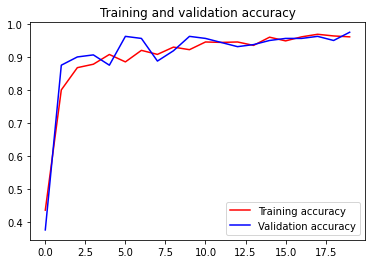

<Figure size 432x288 with 0 Axes>

In [11]:
# membuat plot terhadap akurasi model pada data training dan validasi
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

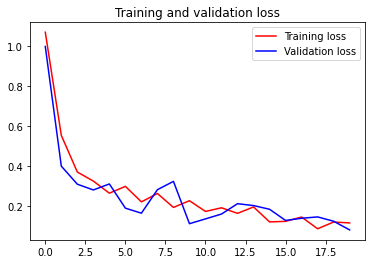

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

Saving paper.png to paper.png
paper.png
[array([[1., 0., 0.]], dtype=float32)]
paper


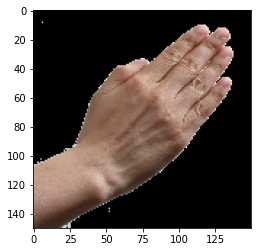

In [13]:
# Melakukan prediksi model dan mencetak hasilnya
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

%matplotlib inline

result = []
uploaded = files.upload()

for path in uploaded.keys():
    img = image.load_img(path, target_size =(150,150)) # Memuat gambar dari path 
    plt.imshow(img)                                    # Menampilkan Gambar
    x = image.img_to_array(img)                        # Mengubah gambar menjadi array
    x = np.expand_dims(x, axis=0)                      # Menambah dimensi di posisi axis yang ditetapkan
    
    images = np.vstack([x])                            # Menumpuk array secara vertikal
    classes = model.predict(images, batch_size=10)     # Prediksi Model
    
    result.append(classes)
    print(path)                                        # Mencetak hasil prediksi
    print(result)
    if classes[0][0]>=classes[0].max():
        print('paper')
    elif classes[0][1]>=classes[0].max():
        print('rock')
    else:
        print('scissors')
   